In [1]:
import numpy as np
from helpers import *
import matplotlib.pyplot as plt
import cv2

In [2]:
f = 1000
deltax = 1920/2 
deltay = 1080/2
K = np.array([
    [f, 0, deltax],
    [0, f, deltay],
    [0, 0, 1]
])
sq2 = np.sqrt(1/2)
T = np.array([
    [sq2, -sq2, 0, 0],
    [sq2, sq2, 0, 0],
    [0, 0, 1, 10]
])
P = K@T
P

array([[ 7.07106781e+02, -7.07106781e+02,  9.60000000e+02,
         9.60000000e+03],
       [ 7.07106781e+02,  7.07106781e+02,  5.40000000e+02,
         5.40000000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+01]])

In [3]:
import itertools
Qs = []
for p in list(itertools.product("01", repeat=3)):
    q = [int(x) for x in p] + [1]
    Qs.append(q)
Qs = np.array(Qs)
qs = (P@Qs.T).T
qs.shape, Qs.shape

((8, 3), (8, 4))

In [4]:
qs = qs / np.stack((qs[:,2],qs[:,2],qs[:,2])).T

In [5]:
Bs = []
for p,q in zip(Qs,qs):
    B = np.kron(p,cross_op(q))
    Bs.append(B)
U,S,V = np.linalg.svd(np.concatenate(Bs,axis=0))
Pest = V[-1].reshape(4,3).T
Pest

array([[-6.33639514e-02,  6.33639514e-02, -8.60257530e-02,
        -8.60257530e-01],
       [-6.33639514e-02, -6.33639514e-02, -4.83894861e-02,
        -4.83894861e-01],
       [ 1.14654380e-17, -1.22894316e-16, -8.96101594e-05,
        -8.96101594e-04]])

In [6]:
qs_est = (Pest@Qs.T).T
qs_est = qs_est / np.stack((qs_est[:,2],qs_est[:,2],qs_est[:,2])).T
np.linalg.norm(qs_est - qs) < 0.001

True

In [7]:
from scipy.spatial.transform import Rotation
Qo = checkerboard_points(10,20)
R1 = Rotation.from_euler('xyz', [np.pi/10, 0, 0]).as_matrix()
R2 = Rotation.from_euler('xyz', [0, 0, 0]).as_matrix()
R3 = Rotation.from_euler('xyz', [-np.pi/10, 0, 0]).as_matrix()
Qo

array([[[-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
         -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5,
         -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5],
        [-2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5,
         -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
         -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
         -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
          0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
        [ 1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,
          1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5],
        [ 2.5,  2.5,  2.5, 

In [8]:
Qo.shape,R1.shape, all(Qo[:,0,0] == Qo.reshape(3,-1).T[0])

((3, 10, 20), (3, 3), True)

In [9]:
Qo = Qo.reshape(3,-1).T
Qo.shape

(200, 3)

In [10]:
Qa = Qo @ R1
Qb = Qo @ R2
Qc = Qo @ R3
Qa,Qb,Qc

(array([[-4.5       , -9.0350369 ,  2.93566145],
        [-4.5       , -8.08398039,  2.62664445],
        [-4.5       , -7.13292387,  2.31762746],
        [-4.5       , -6.18186736,  2.00861046],
        [-4.5       , -5.23081084,  1.69959347],
        [-4.5       , -4.27975432,  1.39057647],
        [-4.5       , -3.32869781,  1.08155948],
        [-4.5       , -2.37764129,  0.77254249],
        [-4.5       , -1.42658477,  0.46352549],
        [-4.5       , -0.47552826,  0.1545085 ],
        [-4.5       ,  0.47552826, -0.1545085 ],
        [-4.5       ,  1.42658477, -0.46352549],
        [-4.5       ,  2.37764129, -0.77254249],
        [-4.5       ,  3.32869781, -1.08155948],
        [-4.5       ,  4.27975432, -1.39057647],
        [-4.5       ,  5.23081084, -1.69959347],
        [-4.5       ,  6.18186736, -2.00861046],
        [-4.5       ,  7.13292387, -2.31762746],
        [-4.5       ,  8.08398039, -2.62664445],
        [-4.5       ,  9.0350369 , -2.93566145],
        [-3.5       

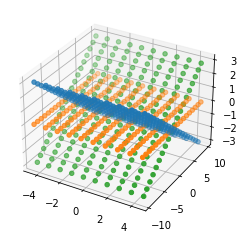

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Qa[:,0], Qa[:,1], Qa[:,2])
ax.scatter(Qb[:,0], Qb[:,1], Qb[:,2])
ax.scatter(Qc[:,0], Qc[:,1], Qc[:,2])

In [12]:
n = 200
Qa

array([[-4.5       , -9.0350369 ,  2.93566145],
       [-4.5       , -8.08398039,  2.62664445],
       [-4.5       , -7.13292387,  2.31762746],
       [-4.5       , -6.18186736,  2.00861046],
       [-4.5       , -5.23081084,  1.69959347],
       [-4.5       , -4.27975432,  1.39057647],
       [-4.5       , -3.32869781,  1.08155948],
       [-4.5       , -2.37764129,  0.77254249],
       [-4.5       , -1.42658477,  0.46352549],
       [-4.5       , -0.47552826,  0.1545085 ],
       [-4.5       ,  0.47552826, -0.1545085 ],
       [-4.5       ,  1.42658477, -0.46352549],
       [-4.5       ,  2.37764129, -0.77254249],
       [-4.5       ,  3.32869781, -1.08155948],
       [-4.5       ,  4.27975432, -1.39057647],
       [-4.5       ,  5.23081084, -1.69959347],
       [-4.5       ,  6.18186736, -2.00861046],
       [-4.5       ,  7.13292387, -2.31762746],
       [-4.5       ,  8.08398039, -2.62664445],
       [-4.5       ,  9.0350369 , -2.93566145],
       [-3.5       , -9.0350369 ,  2.935

In [13]:
P.shape, np.append(Qa, np.ones((n,1)), axis=1).shape

((3, 4), (200, 4))

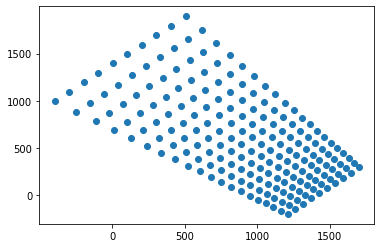

In [40]:
# project!
qa = P @ np.append(Qa, np.ones((n,1)), axis=1).T
qb = P @ np.append(Qb, np.ones((n,1)), axis=1).T
qc = P @ np.append(Qc, np.ones((n,1)), axis=1).T
# qa[:,0] / qa[2:,0], qa[:,0], Qa[0,:]
plt.scatter(shom(qa.T)[:,0],shom(qa.T)[:,1])

In [15]:
Qa.shape, qa.T.shape, qa[:,0]/qa[2,0]

((200, 3),
 (200, 3),
 array([ 1.20790038e+03, -1.99870661e+02,  1.00000000e+00]))

In [16]:
shom(qa.T)[:3], qa.T[:3], Qo[:3]

(array([[ 1.20790038e+03, -1.99870661e+02,  1.00000000e+00],
        [ 1.16070707e+03, -1.64717544e+02,  1.00000000e+00],
        [ 1.11114585e+03, -1.27800628e+02,  1.00000000e+00]]),
 array([[ 1.56249903e+04, -2.58545920e+03,  1.29356614e+01],
        [ 1.46558355e+04, -2.07982986e+03,  1.26266445e+01],
        [ 1.36866807e+04, -1.57420053e+03,  1.23176275e+01]]),
 array([[-4.5, -9.5,  0. ],
        [-4.5, -8.5,  0. ],
        [-4.5, -7.5,  0. ]]))

In [17]:
h, status = cv2.findHomography(Qo[:,:2], shom(qa.T)[:,:2])
h / np.linalg.norm(h)

array([[ 6.36246071e-02, -8.72033708e-02,  8.63796306e-01],
       [ 6.36246064e-02,  4.54959115e-02,  4.85885422e-01],
       [-1.31176877e-12, -2.78049728e-05,  8.99787819e-04]])

In [18]:
# take first point
Qos = Qo[0].copy()
Qos[2] = 1
# project
fp = h @ Qos
print(fp / fp[2])
print(qa[:,0] / qa[2,0])

[ 1.20790037e+03 -1.99870656e+02  1.00000000e+00]
[ 1.20790038e+03 -1.99870661e+02  1.00000000e+00]


In [19]:
qa[:,0]/qa[2,0]

array([ 1.20790038e+03, -1.99870661e+02,  1.00000000e+00])

In [20]:
Qo.shape

(200, 3)

In [21]:
Hs = estimateHomographies(Qo, [qa.T,qb.T,qc.T])
for h,q in zip(Hs,[qa.T,qb.T,qc.T]):
    # take first point
    Qos = Qo[0].copy()
    Qos[2] = 1
    # project
    fp = h @ Qos
    print(fp)
    print(q[0] / q[0][-1])

[ 1.56249903e+03 -2.58545916e+02  1.29356615e+00]
[ 1.20790038e+03 -1.99870661e+02  1.00000000e+00]
[ 1.31355341e+03 -4.49949499e+02  1.00000001e+00]
[ 1.31355339e+03 -4.49949494e+02  1.00000000e+00]
[ 9.98852040e+02 -5.75597357e+02  7.06433856e-01]
[ 1.41393568e+03 -8.14792994e+02  1.00000000e+00]


In [22]:
# Exercise 4.6
B = np.linalg.inv(K).T @ np.linalg.inv(K)
b_true = np.array([[B[0][0],B[0][1],B[1][1],B[0][2],B[1][2],B[2][2]]]).T
B,b_true

(array([[ 1.0000e-06,  0.0000e+00, -9.6000e-04],
        [ 0.0000e+00,  1.0000e-06, -5.4000e-04],
        [-9.6000e-04, -5.4000e-04,  2.2132e+00]]),
 array([[ 1.0000e-06],
        [ 0.0000e+00],
        [ 1.0000e-06],
        [-9.6000e-04],
        [-5.4000e-04],
        [ 2.2132e+00]]))

In [23]:
def v(a,b,H):
    a -= 1
    b -= 1
    return np.array([
        H[0][a]*H[0][b], H[0][a]*H[1][b] + H[1][a]*H[0][b], H[1][a]*H[1][b],
        H[2][a]*H[0][b] + H[0][a]*H[2][b], H[2][a]*H[1][b] + H[1][a]*H[2][b],
        H[2][a]*H[2][b]
    ])  

In [24]:
H = Hs[2]
v12 = v(2,2,H)
ha = H[:,1]
hb = H[:,1]
# sanity check, these must be the same!
v12 @ b_true, hb@B@ha

(array([0.01]), 0.010000000047430024)

In [25]:
Hs[0]

array([[ 7.07106784e+01, -9.69154826e+01,  9.60000000e+02],
       [ 7.07106777e+01,  5.05629333e+01,  5.40000000e+02],
       [-1.45786455e-09, -3.09016996e-02,  1.00000000e+00]])

In [26]:
V = []
for H in Hs:
    H = H
    v12 = v(1,2,H)
    v11 = v(1,1,H)
    v22 = v(2,2,H)
    V.append(v12)
    V.append(np.subtract(v11,v22))
V = np.array(V)
u, s, vh = np.linalg.svd(V)
b_est = vh[np.argmin(s)]
b_true.T / b_est

array([[2.21320048, 0.        , 2.21320048, 2.21320051, 2.21320034,
        2.21320027]])

In [27]:
# https://kushalvyas.github.io/calib.html
def get_intrinsic_parameters(H_r):
    M = len(H_r)
    V = np.zeros((2*M, 6), np.float64)

    def v_pq(p, q, H):
        v = np.array([
                H[0, p]*H[0, q],
                H[0, p]*H[1, q] + H[1, p]*H[0, q],
                H[1, p]*H[1, q],
                H[2, p]*H[0, q] + H[0, p]*H[2, q],
                H[2, p]*H[1, q] + H[1, p]*H[2, q],
                H[2, p]*H[2, q]
            ])
        return v

    for i in range(M):
        H = -H_r[i]
        V[2*i] = v_pq(p=0, q=1, H=H)
        V[2*i + 1] = np.subtract(v_pq(p=0, q=0, H=H), v_pq(p=1, q=1, H=H))

    # solve V.b = 0
    u, s, vh = np.linalg.svd(V)
    b = vh[np.argmin(s)]
    return b

In [28]:
b = get_intrinsic_parameters(Hs)
b

array([ 4.51834350e-07,  1.31513565e-15,  4.51834351e-07, -4.33760970e-04,
       -2.43990565e-04,  9.99999876e-01])

In [29]:
vc=(b[1]*b[3]-b[0]*b[4])/(b[0]*b[2]-b[1]**2)
l=b[5]-(b[3]**2+vc*(b[1]*b[2]-b[0]*b[4]))/b[0]
alpha=np.sqrt((l/b[0]))
beta=np.sqrt( (l*b[0]) / (b[0]*b[2]-b[1]**2) )
gamma=-1*((b[1])*(alpha**2)*(beta/l))
uc=(gamma*vc/beta)-(b[3]*(alpha**2)/l)

In [30]:
A = np.array([
    [alpha, gamma, uc],
    [0, beta, vc],
    [0, 0, 1],
])
A, K

(array([[ 1.00000010e+03, -2.91065913e-06,  9.59999986e+02],
        [ 0.00000000e+00,  1.00000010e+03,  5.40000031e+02],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 array([[1000.,    0.,  960.],
        [   0., 1000.,  540.],
        [   0.,    0.,    1.]]))

In [31]:
# TODO:
#  estimateExtrinsics(K, Hs)
#  make helpers for the code i wrote?